In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d

In [7]:
import openpyxl
print(openpyxl.__version__)

3.1.5


In [8]:
ttc = pd.read_excel(r'C:\Users\irene\DSI\team_project\ttc-streetcar-delay-data-2024_cleaned.xlsx')
ttc

,Date,Line,Time,Day,Location,Incident,Min Delay,Min Gap,Bound,Vehicle,Month,Week,Day of Month,Hour of Day,Season
0,2024-04-28,301,03:54,Sunday,WOLSELEY LOOP,Cleaning - Unsanitary,30,60,E,8118,4,18,28,3,Spring
1,2024-09-14,301,02:23,Saturday,WOLSELEY LOOP,Utilized Off Route,30,60,W,8112,9,37,14,2,Summer
2,2024-01-28,301,02:11,Sunday,WARDEN AND COMSTOCK,Mechanical,10,20,W,8734,1,5,28,2,Winter
3,2024-11-15,301,02:35,Friday,THE QUEENSWAY AND WIND,Security,24,39,W,4588,11,46,15,2,Fall
4,2024-08-25,301,03:11,Sunday,THE QUEENSWAY AND GLEN,Mechanical,10,30,E,4569,8,35,25,3,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13926,2024-04-22,512,15:38,Monday,AND OAKWOOD,General Delay,0,0,W,7006,4,17,22,15,Spring
13927,2024-02-18,512,19:50,Sunday,AND KEELE,Operations,8,15,E,8337,2,8,18,19,Winter
13928,2024-04-19,512,20:24,Friday,AND GLENHOLME,Mechanical,10,20,W,8799,4,16,19,20,Spring
13929,2024-02-20,512,16:20,Tuesday,AND EARLS COU,Collision - TTC Involved,4,8,E,8295,2,8,20,16,Winter


In [67]:
columns = ttc.columns
columns

Index(['Date', 'Line', 'Time', 'Day', 'Location', 'Incident', 'Min Delay',
       'Min Gap', 'Bound', 'Vehicle', 'Month', 'Week', 'Day of Month',
       'Hour of Day', 'Season'],
      dtype='object')

In [9]:
# inspecting data set: checking data types, if there's any null entries
ttc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13931 entries, 0 to 13930
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          13931 non-null  datetime64[ns]
 1   Line          13931 non-null  int64         
 2   Time          13931 non-null  object        
 3   Day           13931 non-null  object        
 4   Location      13930 non-null  object        
 5   Incident      13931 non-null  object        
 6   Min Delay     13931 non-null  int64         
 7   Min Gap       13931 non-null  int64         
 8   Bound         11960 non-null  object        
 9   Vehicle       13931 non-null  int64         
 10  Month         13931 non-null  int64         
 11  Week          13931 non-null  int64         
 12  Day of Month  13931 non-null  int64         
 13  Hour of Day   13931 non-null  int64         
 14  Season        13931 non-null  object        
dtypes: datetime64[ns](1), int64(8), obje

In [10]:
# checking first 5 rows
ttc.head()

,Date,Line,Time,Day,Location,Incident,Min Delay,Min Gap,Bound,Vehicle,Month,Week,Day of Month,Hour of Day,Season
0,2024-04-28,301,03:54,Sunday,WOLSELEY LOOP,Cleaning - Unsanitary,30,60,E,8118,4,18,28,3,Spring
1,2024-09-14,301,02:23,Saturday,WOLSELEY LOOP,Utilized Off Route,30,60,W,8112,9,37,14,2,Summer
2,2024-01-28,301,02:11,Sunday,WARDEN AND COMSTOCK,Mechanical,10,20,W,8734,1,5,28,2,Winter
3,2024-11-15,301,02:35,Friday,THE QUEENSWAY AND WIND,Security,24,39,W,4588,11,46,15,2,Fall
4,2024-08-25,301,03:11,Sunday,THE QUEENSWAY AND GLEN,Mechanical,10,30,E,4569,8,35,25,3,Summer


In [11]:
# getting the distinctive incident categories
ttc['Incident'].unique()

array(['Cleaning - Unsanitary', 'Utilized Off Route', 'Mechanical',
       'Security', 'Emergency Services', 'Operations', 'Overhead',
       'General Delay', 'Diversion', 'Investigation', 'Held By',
       'Rail/Switches', 'Collision - TTC Involved'], dtype=object)

In [12]:
# out of 14206 entries, how many incidents are each category?
ttc['Incident'].value_counts()

Incident
Operations                  2227
Security                    1809
General Delay               1740
Diversion                   1707
Mechanical                  1668
Cleaning - Unsanitary       1357
Emergency Services          1310
Held By                      738
Collision - TTC Involved     653
Utilized Off Route           327
Investigation                215
Rail/Switches                127
Overhead                      53
Name: count, dtype: int64

In [13]:
# getting the fractions of each incident category
ttc['Incident'].value_counts(normalize = True)

Incident
Operations                  0.159859
Security                    0.129854
General Delay               0.124901
Diversion                   0.122532
Mechanical                  0.119733
Cleaning - Unsanitary       0.097409
Emergency Services          0.094035
Held By                     0.052975
Collision - TTC Involved    0.046874
Utilized Off Route          0.023473
Investigation               0.015433
Rail/Switches               0.009116
Overhead                    0.003804
Name: proportion, dtype: float64

In [14]:
# getting the % of each incident category
100 * ttc.groupby('Incident').size() / ttc.shape[0]

Incident
Cleaning - Unsanitary        9.740866
Collision - TTC Involved     4.687388
Diversion                   12.253248
Emergency Services           9.403489
General Delay               12.490130
Held By                      5.297538
Investigation                1.543321
Mechanical                  11.973297
Operations                  15.985931
Overhead                     0.380446
Rail/Switches                0.911636
Security                    12.985428
Utilized Off Route           2.347283
dtype: float64

In [15]:
# found a few missing null values: 156 lines, 1 location, 2128 bounds
ttc.isnull().sum()

Date               0
Line               0
Time               0
Day                0
Location           1
Incident           0
Min Delay          0
Min Gap            0
Bound           1971
Vehicle            0
Month              0
Week               0
Day of Month       0
Hour of Day        0
Season             0
dtype: int64

In [16]:
# dropping the null values; then double checking to see if we have anymore null values
ttc_clean = ttc.dropna()
ttc_clean.isna().sum()

Date            0
Line            0
Time            0
Day             0
Location        0
Incident        0
Min Delay       0
Min Gap         0
Bound           0
Vehicle         0
Month           0
Week            0
Day of Month    0
Hour of Day     0
Season          0
dtype: int64

In [17]:
# deciding to fill null values with 'Unknown' since my Date & Day columns won't be affected by these null values
ttc = ttc.fillna({'Location': 'Unknown', 'Bound': 'Unknown', 'Line': 'Unknown'})

In [18]:
# double checking if there's null values
ttc.isnull().sum()

Date            0
Line            0
Time            0
Day             0
Location        0
Incident        0
Min Delay       0
Min Gap         0
Bound           0
Vehicle         0
Month           0
Week            0
Day of Month    0
Hour of Day     0
Season          0
dtype: int64

In [19]:
# 2. converting Date column '01-Jan-24' string format to datetime format
ttc['Date'] = pd.to_datetime(ttc['Date'])
ttc['Date']

0       2024-04-28
1       2024-09-14
2       2024-01-28
3       2024-11-15
4       2024-08-25
           ...    
13926   2024-04-22
13927   2024-02-18
13928   2024-04-19
13929   2024-02-20
13930   2024-05-13
Name: Date, Length: 13931, dtype: datetime64[ns]

In [20]:
# 2. changing the Day format from 'Monday' string to 'Monday' to weekday format
ttc['Day'] = ttc['Date'].dt.day_name()
ttc['Day']

0          Sunday
1        Saturday
2          Sunday
3          Friday
4          Sunday
           ...   
13926      Monday
13927      Sunday
13928      Friday
13929     Tuesday
13930      Monday
Name: Day, Length: 13931, dtype: object

In [21]:
# 2. Sorting data frame by Date chronologically, in case data was entered randomly
ttc = ttc.sort_values('Date')
ttc

,Date,Line,Time,Day,Location,Incident,Min Delay,Min Gap,Bound,Vehicle,Month,Week,Day of Month,Hour of Day,Season
9589,2024-01-01,507,04:52,Monday,RONCESVALLES YARD,General Delay,6,18,E,4479,1,1,1,4,Winter
6310,2024-01-01,505,05:11,Monday,RONCESVALLES YARD,General Delay,5,15,E,4463,1,1,1,5,Winter
8881,2024-01-01,506,21:22,Monday,DUNDAS AND STERLING,Diversion,8,18,Unknown,0,1,1,1,21,Winter
6060,2024-01-01,504,18:45,Monday,BROADVIEW AND WOLFREY,Mechanical,9,18,W,8753,1,1,1,18,Winter
1498,2024-01-01,501,17:22,Monday,QUEEN AND JOHN,Mechanical,6,12,W,8382,1,1,1,17,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9490,2024-12-31,506,22:32,Tuesday,CARLTON AND JARVIS,General Delay,0,0,Unknown,0,12,53,31,22,Winter
6058,2024-12-31,504,05:27,Tuesday,BROADVIEW STATION,Emergency Services,10,20,Unknown,4628,12,53,31,5,Winter
293,2024-12-31,306,04:14,Tuesday,COLLEGE AND EUCLID,Diversion,49,64,Unknown,4403,12,53,31,4,Winter
13684,2024-12-31,512,03:01,Tuesday,QUEEN AND LESLIE,Security,0,0,E,4497,12,53,31,3,Winter


In [23]:
# grouping rows that had the same day and same incident category, 
# counting it, converting into DataFrame, 
# then naming a new column 'Count' with the numbers
weekday_counts = ttc.groupby(['Day', 'Incident']).size().reset_index(name='Count')
weekday_counts

,Day,Incident,Count
0,Friday,Cleaning - Unsanitary,199
1,Friday,Collision - TTC Involved,96
2,Friday,Diversion,228
3,Friday,Emergency Services,193
4,Friday,General Delay,263
...,...,...,...
86,Wednesday,Operations,293
87,Wednesday,Overhead,7
88,Wednesday,Rail/Switches,21
89,Wednesday,Security,279


In [22]:
# grouping all rows with same incident and same date here, 
# counting it, converting back to DataFrame, 
# then naming a new column as 'Count'
daily_counts = ttc.groupby(['Date', 'Incident']).size().reset_index(name='Count')
daily_counts

,Date,Incident,Count
0,2024-01-01,Cleaning - Unsanitary,3
1,2024-01-01,Collision - TTC Involved,2
2,2024-01-01,Diversion,7
3,2024-01-01,Emergency Services,8
4,2024-01-01,General Delay,16
...,...,...,...
3539,2024-12-31,Mechanical,1
3540,2024-12-31,Operations,9
3541,2024-12-31,Rail/Switches,1
3542,2024-12-31,Security,8


<Axes: xlabel='Date', ylabel='Count'>

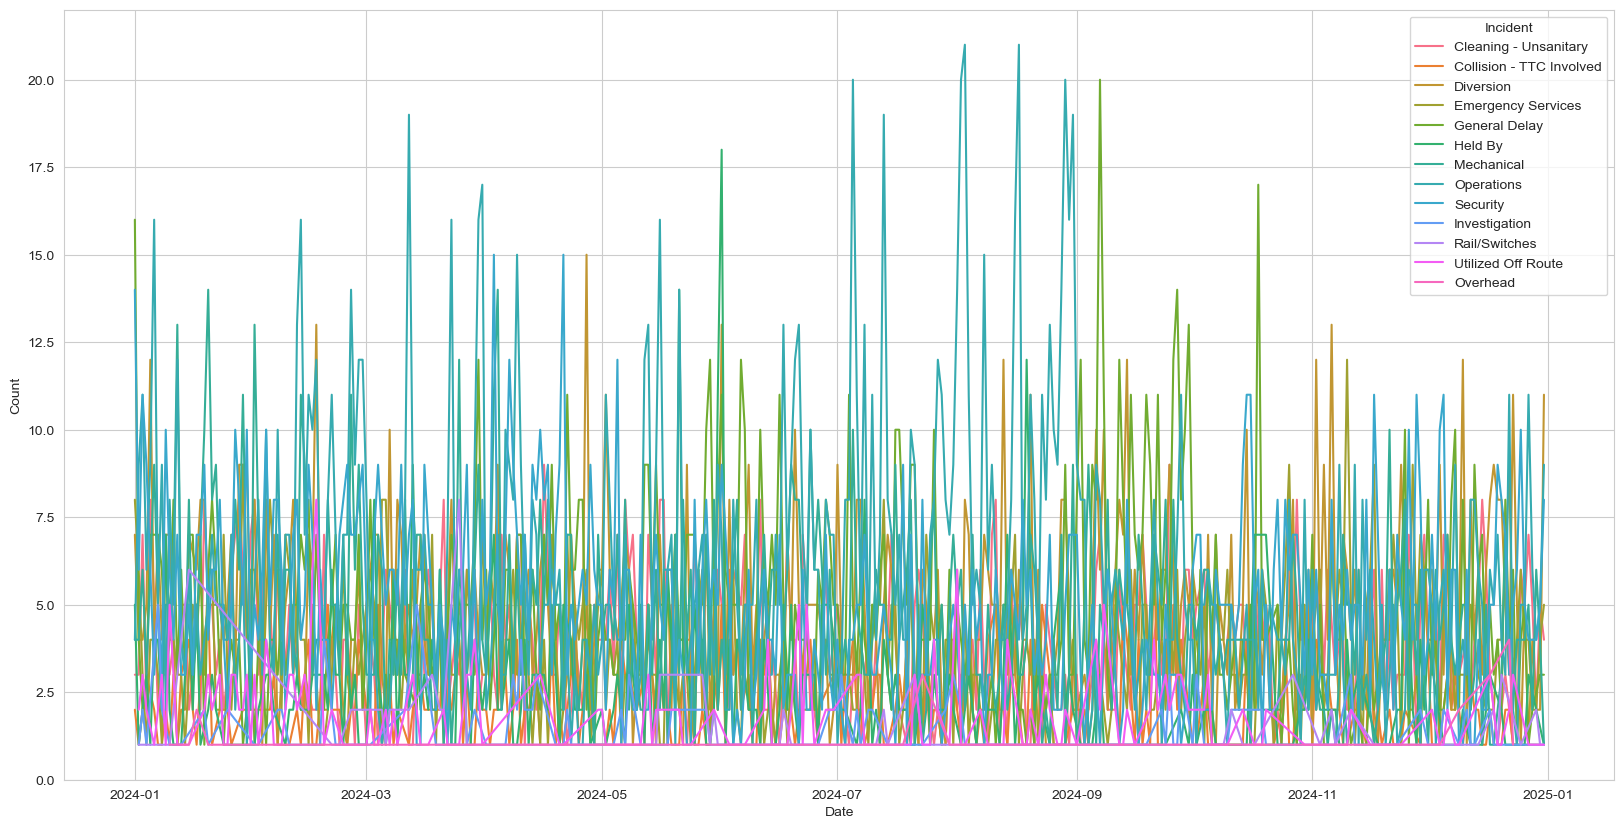

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# wider figure
plt.figure(figsize=(20,10))

sns.set_style('whitegrid')
sns.lineplot(data = daily_counts,
             x='Date',
             y='Count',
             hue='Incident')


<Axes: xlabel='Season', ylabel='Season_Count'>

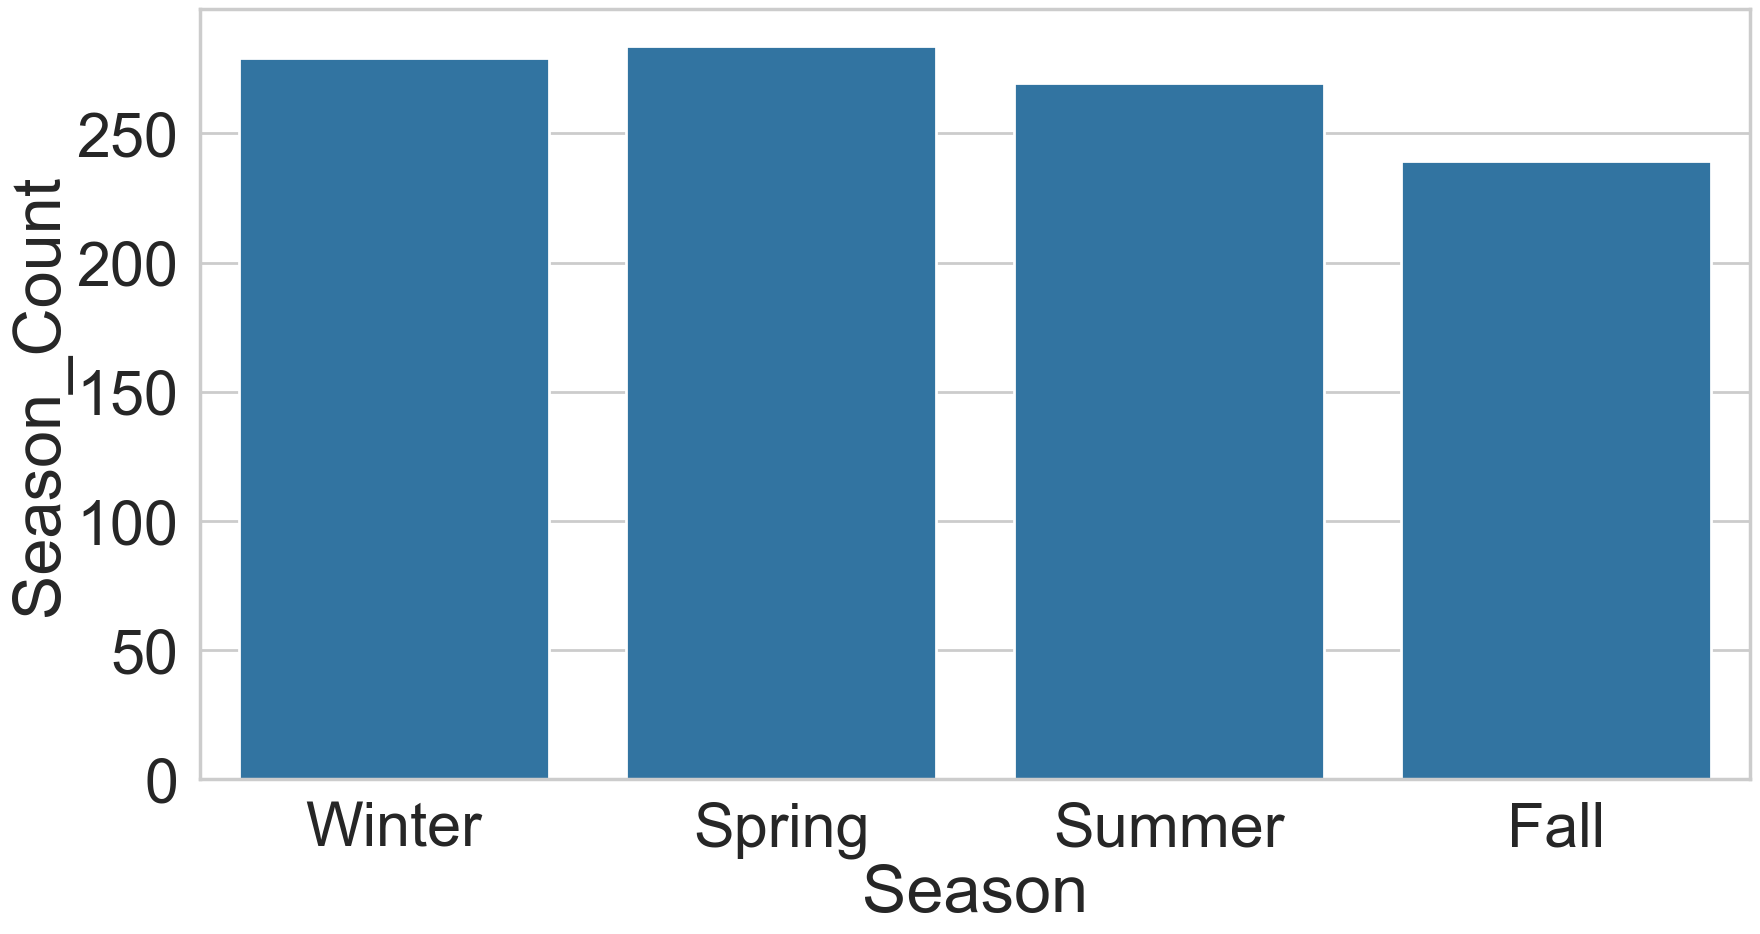

In [ ]:
# i messed up here, now trying to fix it by doing a relplot for categories vs. seasons

ttc['Season'] = ttc['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

season_counts = ttc.groupby(['Season', 'Incident']).size().reset_index(name='Season_Count')

plt.figure(figsize = (20,10))

sns.barplot(data=season_counts, 
              x='Season',
              y='Season_Count',
              errorbar=None,
              order=['Winter', 'Spring', 'Summer', 'Fall']
              )

sns.set_context('poster', font_scale = 2)

# 6 panel plots = 6 groups of incident categories (by human vs. ___)
# total incident frequency vs. date
sns.relplot(
    data=daily_counts,
    x='Date',
    y='Count',
    kind='line',
    col='Incident', # creates a panel for each unique value in Incident category, eg. if you've 6 categories, you'll get 6 plots
    col_wrap = 3, # controls how many plots show in a row
    height=10, # height is 10 inches tall
    aspect=2, # aspect ratio: width would be 20
)

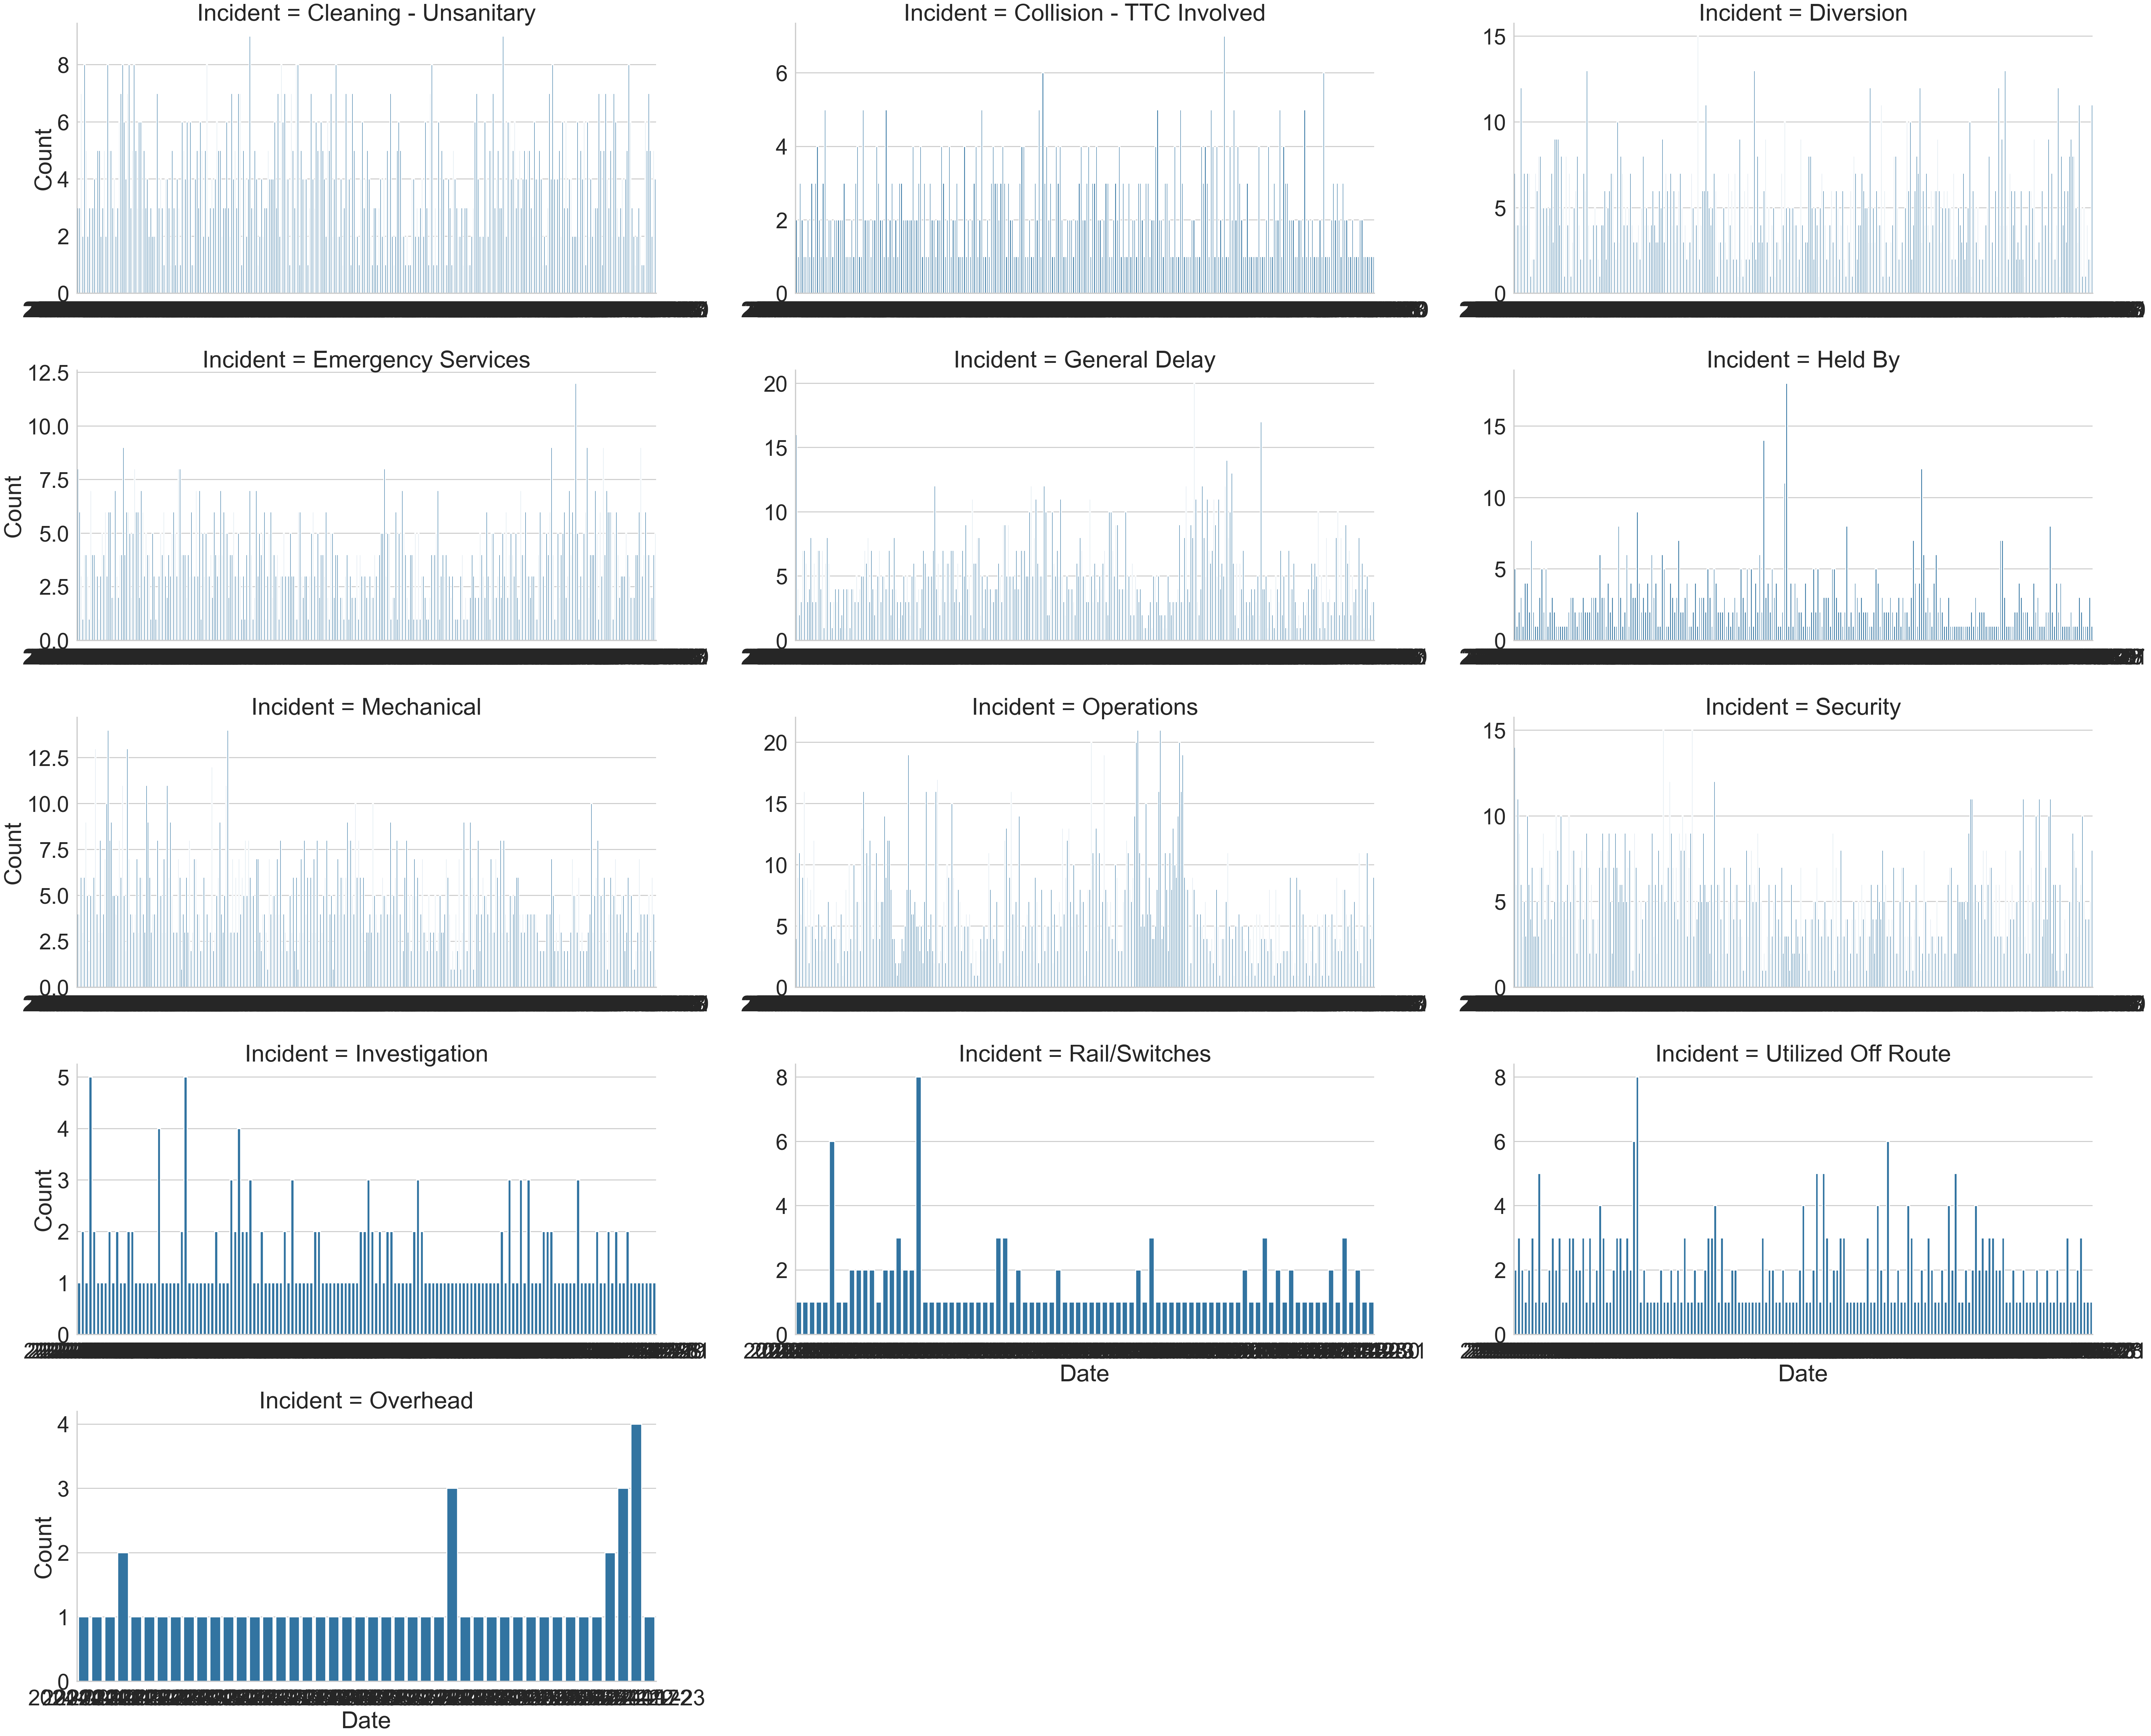

In [63]:
sns.set_context('poster', font_scale = 2)

# 6 panel plots = 6 groups of incident categories (by human vs. ___)
# total incident frequency vs. date
sns.catplot(
    data=daily_counts,
    x='Date',
    y='Count',
    kind='bar',
    col='Incident', # creates a panel for each unique value in Incident category, eg. if you've 6 categories, you'll get 6 plots
    col_wrap = 3, # controls how many plots show in a row
    height=10, # height is 10 inches tall
    aspect=2, # aspect ratio: width would be 20
    sharex=False,
    sharey=False
)


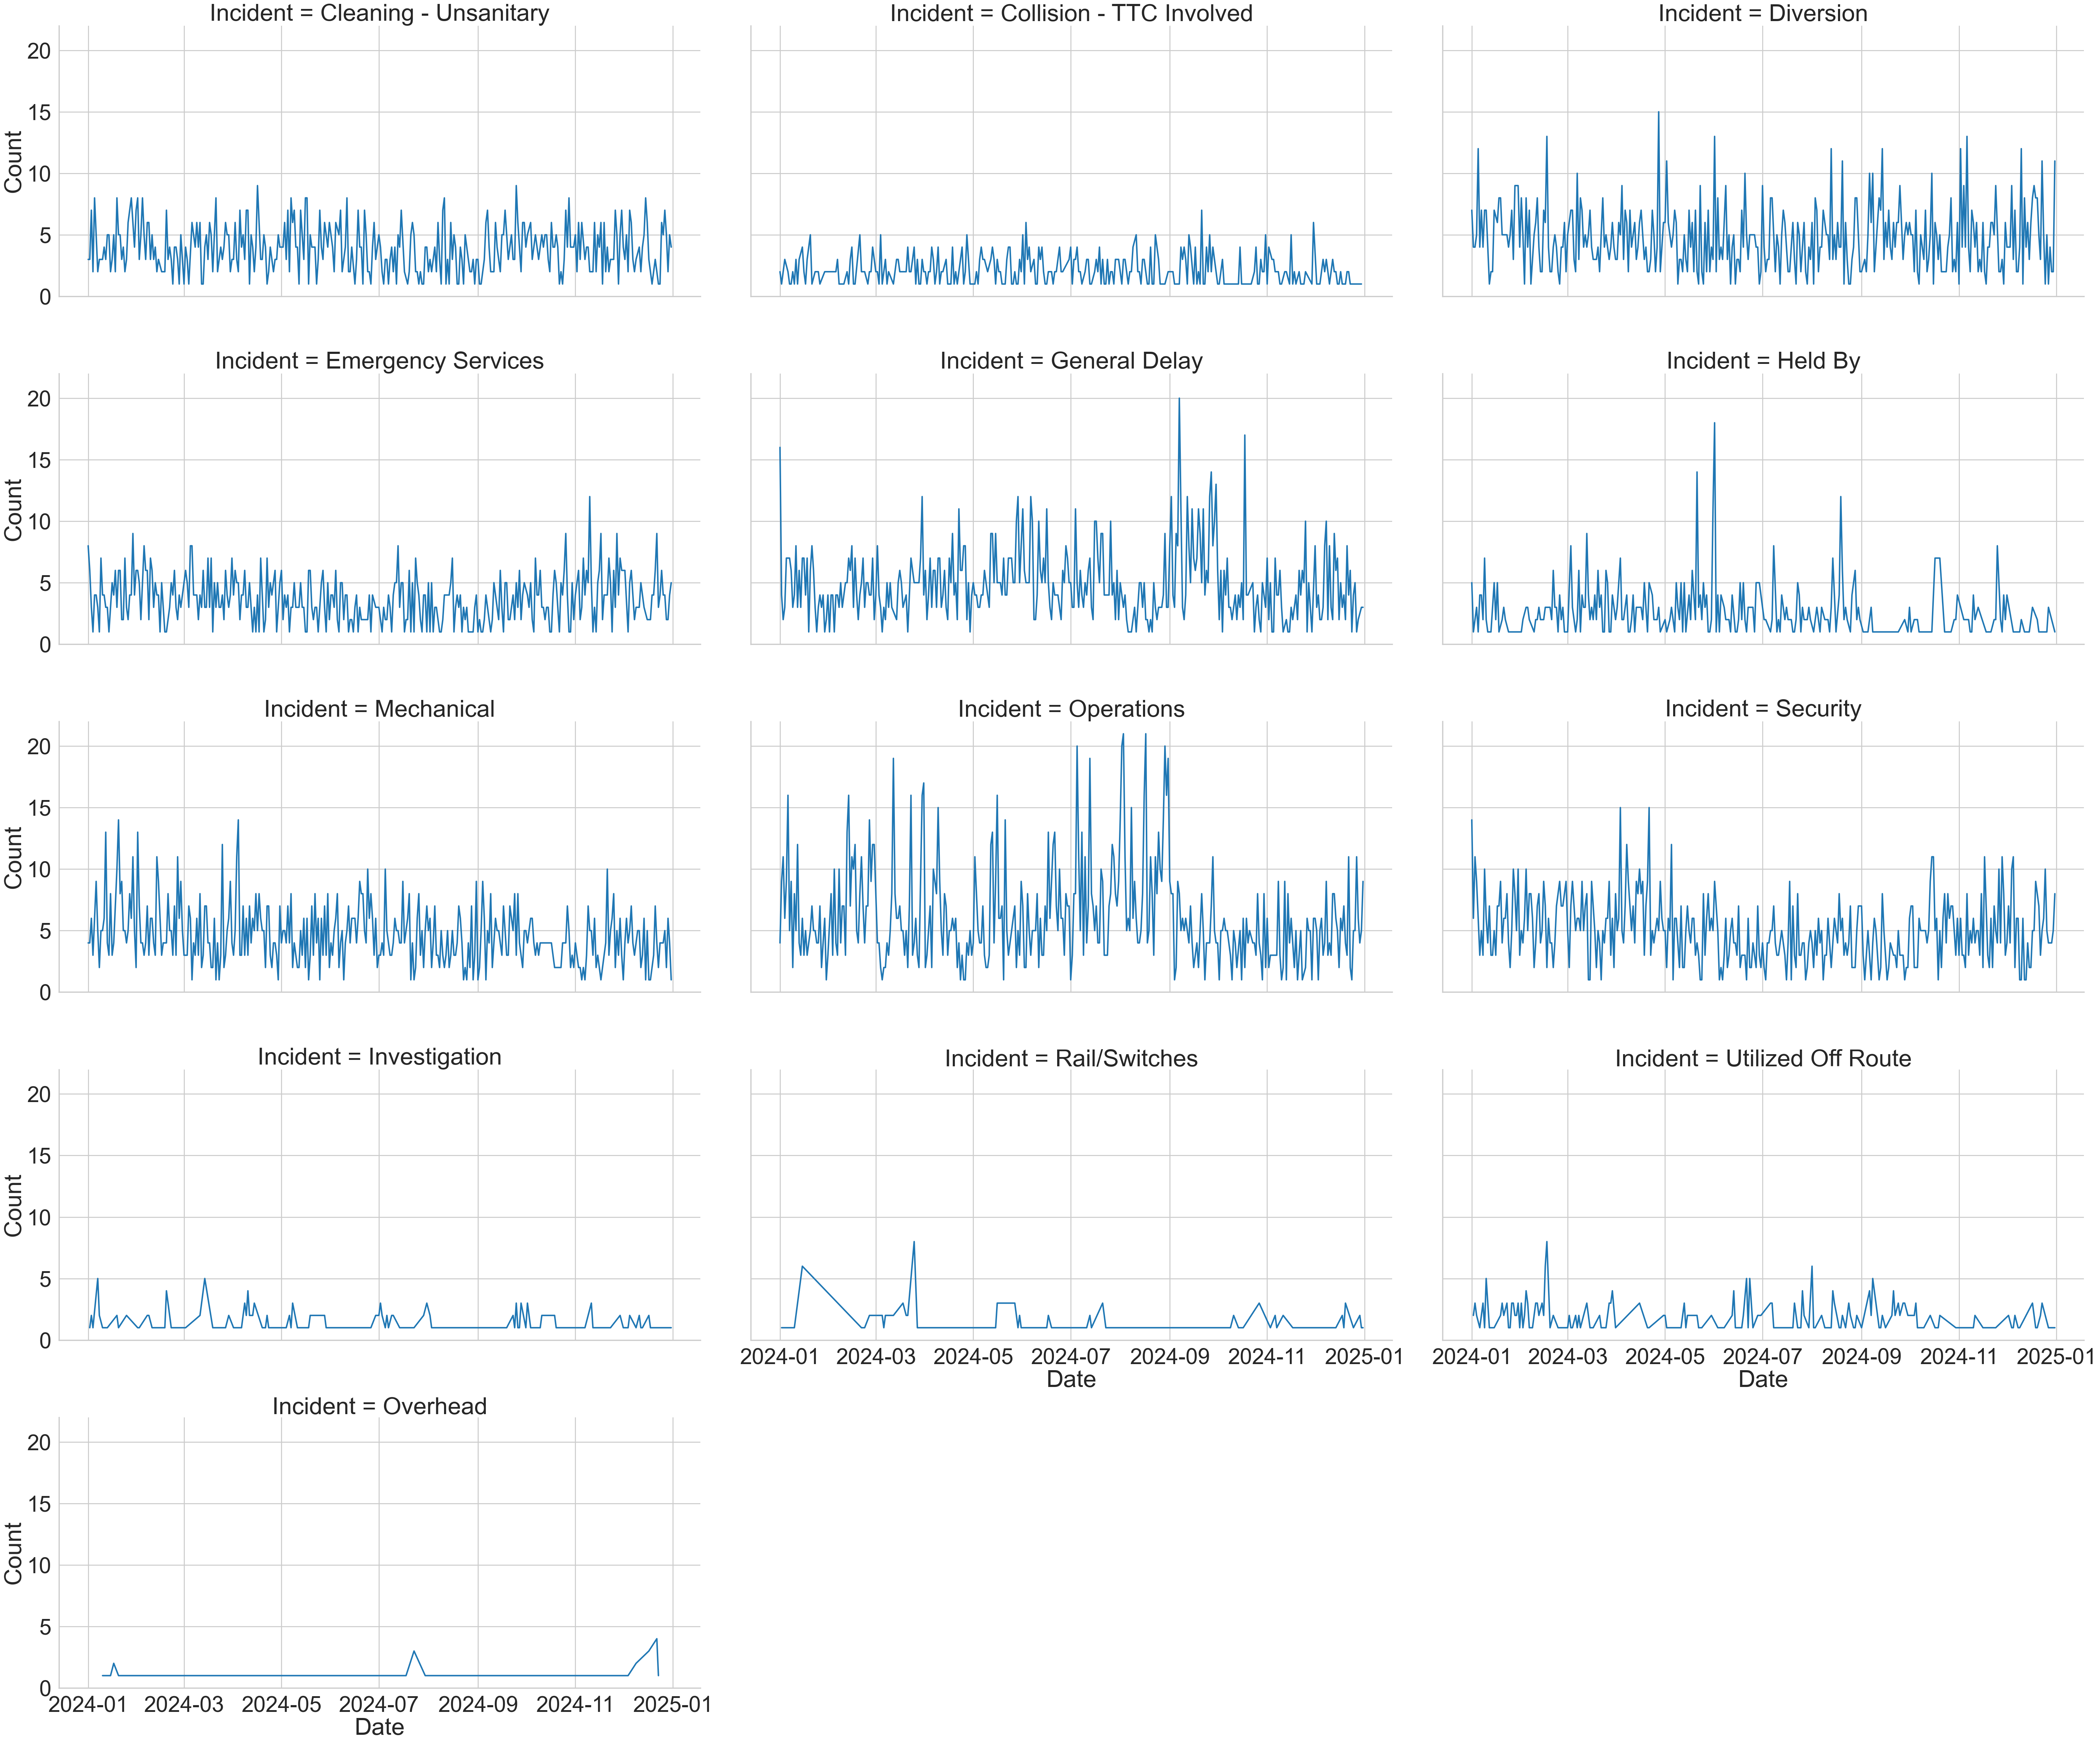

In [65]:
sns.set_context('poster', font_scale = 2)

# 6 panel plots = 6 groups of incident categories (by human vs. ___)
# total incident frequency vs. date
sns.relplot(
    data=daily_counts,
    x='Date',
    y='Count',
    kind='line',
    col='Incident', # creates a panel for each unique value in Incident category, eg. if you've 6 categories, you'll get 6 plots
    col_wrap = 3, # controls how many plots show in a row
    height=10, # height is 10 inches tall
    aspect=2, # aspect ratio: width would be 20
)

<Axes: xlabel='Day', ylabel='Count'>

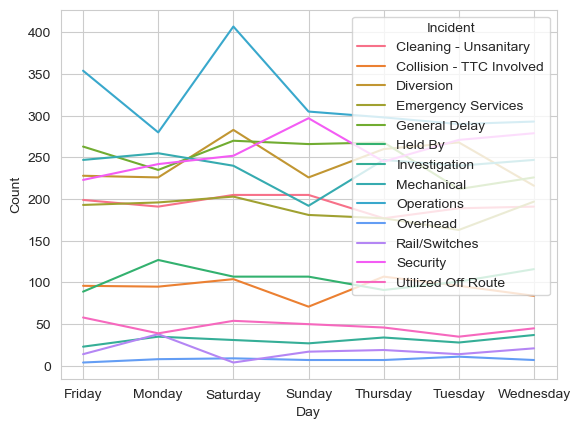

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data = weekday_counts,
             x='Day',
             y='Count',
             hue='Incident')
